In [3]:
import polars as pl
tb_bas_oper_part_mst = (pl.read_parquet('../data/tb_bas_oper_part_mst.parquet')
                        .select(['OPER_PART_NO', 'OPER_PART_NM'])
                        .rename({'OPER_PART_NO': 'oper_part_no', 'OPER_PART_NM': 'oper_part_nm'}))
tb_dyn_fcst_demand = (pl.read_parquet('../data/tb_dyn_fcst_dmnd.parquet')
                      .select(['PART_NO', 'DMND_QTY', 'DMND_DT', 'OPER_PART_NO'])
                      .rename({'PART_NO': 'part_no', 'OPER_PART_NO': 'oper_part_no', 'DMND_DT': 'demand_dt', 'DMND_QTY': 'demand_qty'})
                      .select(['part_no', 'oper_part_no', 'demand_dt', 'demand_qty']))
tb_dyn_fcst_demand_sellout = (pl.read_parquet('../data/tb_dyn_fcst_dmnd_sellout.parquet')
                              .select(['PART_NO', 'DMND_QTY', 'DMND_DT', 'OPER_PART_NO'])
                              .rename({'PART_NO': 'part_no', 'OPER_PART_NO': 'oper_part_no', 'DMND_DT': 'demand_dt', 'DMND_QTY': 'demand_qty'})
                              .select(['part_no', 'oper_part_no', 'demand_dt', 'demand_qty']))

# Unique Value Check
Data를 확인해보니, TB_DYN_FCST_DEMAND_SELLOUT 과 TB_DYN_FCST_DEMAND는 동일한 테이블로 보임..


In [4]:
# oper_part_mst unique part
print(tb_bas_oper_part_mst.select(pl.col('oper_part_no')).n_unique())

# dyn_fcst_demand unique part/oper_part
print(tb_dyn_fcst_demand.select(pl.col('part_no')).n_unique())
print(tb_dyn_fcst_demand.select(pl.col('oper_part_no')).n_unique())

# dyn_fcst_demand_sellout unique part/oper_part
print(tb_dyn_fcst_demand_sellout.select(pl.col('part_no')).n_unique())
print(tb_dyn_fcst_demand_sellout.select(pl.col('oper_part_no')).n_unique())

97530
50233
43896
50233
43896


In [5]:
tb_bas_oper_part_mst.write_parquet('../data/parquets/oper_part_mst.parquet')
tb_dyn_fcst_demand.write_parquet('../data/parquets/dyn_demand.parquet')

In [9]:
import datetime
from datetime import datetime

dyn_fcst_demand = tb_dyn_fcst_demand.with_columns([
    pl.col('demand_dt').cast(pl.Utf8).cast()
])

part_no,oper_part_no,demand_dt,demand_qty
str,str,i64,f64
"""T4240-71102BB""","""T4240-71102BB""",20180101,3.0
"""T5210-34402""","""T5210-34402""",20180101,1.0
"""T5210-30081""","""T5210-30081""",20180101,1.0
"""T5210-65661""","""T5210-65661""",20180101,1.0
"""T5210-66472""","""T5210-66472""",20180101,1.0
…,…,…,…
"""U3215-52203""","""U3215-52203""",20240205,30.0
"""T5710-69252""","""T5710-69252""",20240205,2.0
"""DYD1-O07""","""DYD1-O07""",20240205,4.0


part_no,oper_part_no,demand_dt,demand_qty
str,str,i64,f64
"""T4240-71102BB""","""T4240-71102BB""",20180101,3.0
"""T5210-34402""","""T5210-34402""",20180101,1.0
"""T5210-30081""","""T5210-30081""",20180101,1.0
"""T5210-65661""","""T5210-65661""",20180101,1.0
"""T5210-66472""","""T5210-66472""",20180101,1.0
…,…,…,…
"""U3215-52203""","""U3215-52203""",20240205,30.0
"""T5710-69252""","""T5710-69252""",20240205,2.0
"""DYD1-O07""","""DYD1-O07""",20240205,4.0


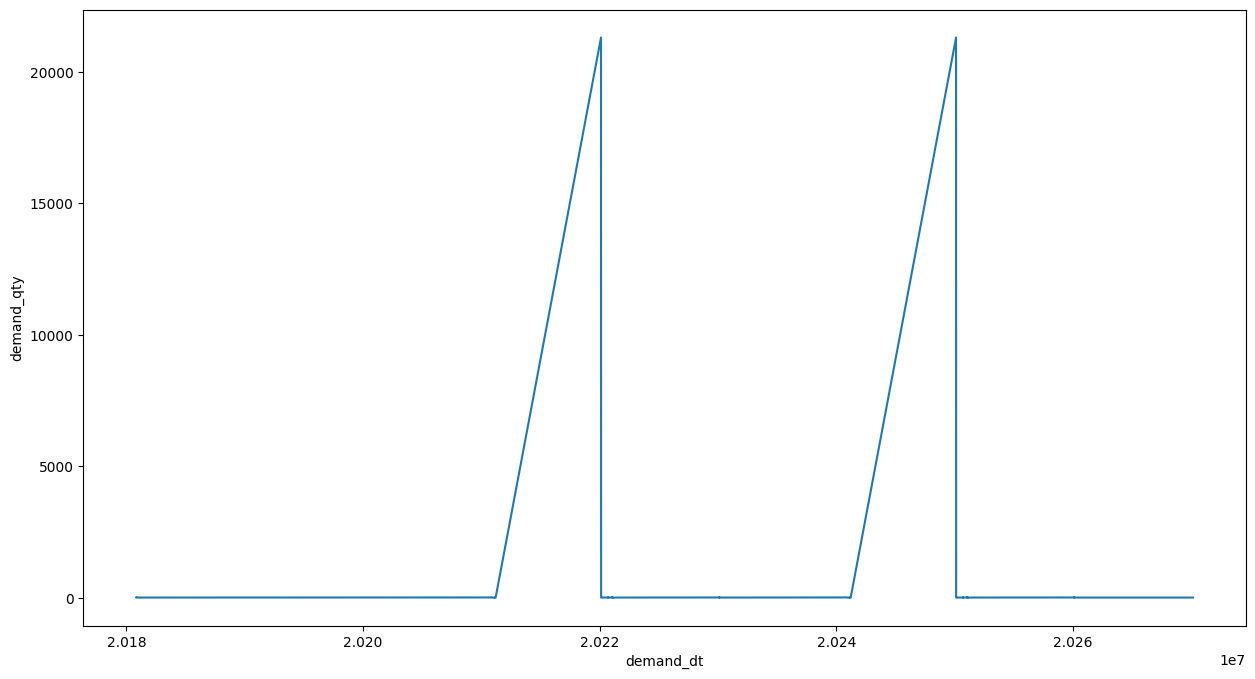

In [18]:
import matplotlib.pyplot as plt
pl.Config(fmt_float = 'full')

tb_dyn_fcst_demand_sellout.with_columns([
    pl.col('demand_dt').cast(pl.Utf8).str.strptime(pl.Date, format = '%Y%m%d').alias('demand_dt')
])


test_part = tb_dyn_fcst_demand_sellout.filter(pl.col('oper_part_no') == "C7110-15131").sort(by='demand_dt').to_pandas()

plt.figure(figsize = (15, 8))
plt.plot(test_part['demand_dt'], test_part['demand_qty'])
plt.xlabel('demand_dt')
plt.ylabel('demand_qty')
plt.show()